# Football Home Advantage Analysis

#### Importing necessary libraries and reading in the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\yadhu\Downloads\footballresults.csv')


The dataframe consists of the below columns
<br>date - date of the match.
<br>home_team - the name of the home team.
<br>away_team - the name of the away team.
<br>home_score - full-time home team score including extra time, not including penalty-shootouts.
<br>away_score - full-time away team score including extra time, not including penalty-shootouts.
<br>tournament - the name of the tournament.
<br>city - the name of the city/town/administrative unit where the match was played.
<br>country - the name of the country where the match was played.
<br>neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue.
<br>


#### Quick view of the data

In [2]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#### Is the data clean?

In [3]:
#Checking if there are any duplicated rows

df[df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [4]:
# Checking if there is any missing data
#looping through the data to see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

date - 0%
home_team - 0%
away_team - 0%
home_score - 0%
away_score - 0%
tournament - 0%
city - 0%
country - 0%
neutral - 0%


In [5]:
# Are there any na values
nan_df = df[df.isna().any(axis = 1)]
nan_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


<AxesSubplot:>

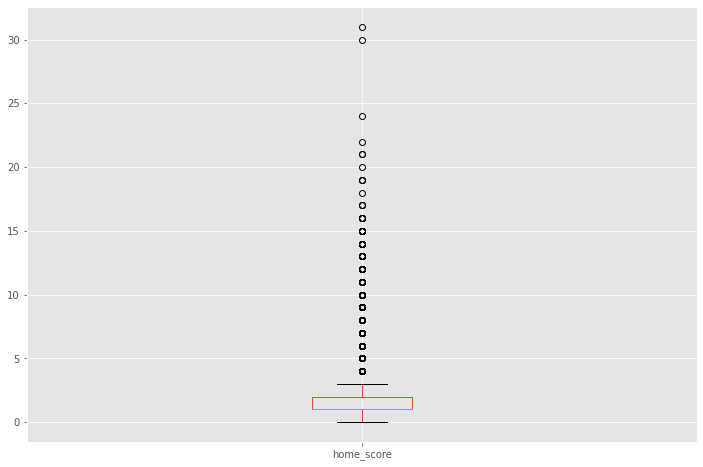

In [6]:
# Are there any Outliers in the home score data?

df.boxplot(column=['home_score'])

In [7]:
#Checking the extreme values of the home score data
print(df['home_score'].min())
print(df['home_score'].max())

#Seeing the extreme 
df[df['home_score'] > 25]

0
31


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
8009,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
23965,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


<AxesSubplot:>

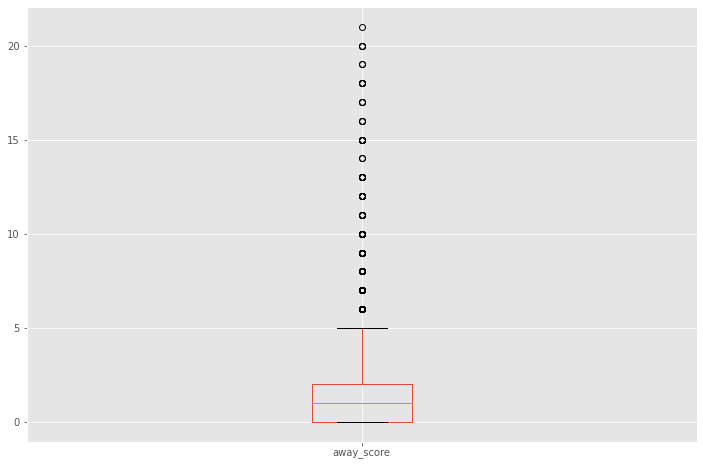

In [8]:
# Are there any Outliers in the away score data?

df.boxplot(column=['away_score'])

In [9]:
#Checking the extreme values of the away score data
print(df['away_score'].min())
print(df['away_score'].max())

df[df['away_score'] > 20]

0
21


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27542,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


### Analysis

#### Removing games played in a neutral venue

In [10]:
df = df.drop(df[df['neutral'] == True].index)


In [11]:
#Verifying that the neutral venues are removed
df[df['neutral'] == True]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


#### Selecting teams that have played both home and away games

In [13]:
#Selecting teams that have played both home and away games
df = df[df.away_team.isin(df['home_team'].unique())]
df = df[df.home_team.isin(df['away_team'].unique())]

#### Adding home win and away win columns

In [14]:

df['home_win'] = np.where((df['home_score'] > df['away_score']), 'Yes', 'No')
df['away_win'] = np.where((df['home_score'] < df['away_score']), 'Yes', 'No')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No,No
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Yes,No
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Yes,No
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No,No
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
43415,2022-03-29,Uzbekistan,Uganda,4,2,Navruz Cup,Namangan,Uzbekistan,False,Yes,No
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False,Yes,No
43417,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False,Yes,No
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False,Yes,No


In [15]:
#How many times the home team won Yes implies that the home team won and vice versa
df['home_win'].value_counts()

Yes    16411
No     16107
Name: home_win, dtype: int64

In [16]:
#How many times the away team won Yes implies that the away team won and vice versa
df['away_win'].value_counts()

No     23949
Yes     8569
Name: away_win, dtype: int64

In [17]:
#Checking to see the number of home teams
df['home_team'].nunique() 

254

In [18]:
#Checking to see the number of away teams
df['away_team'].nunique() 

254

In [19]:
#Verifying that the teams included in the analysis played both home and away
df[~df.away_team.isin(df['home_team'].unique())]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win


#### Home Win Analysis

In [20]:
#grouping by home team and then by home win
gb_home = df.groupby(['home_team','home_win'])

#Viewing the data for Germany for verification
gb_home.get_group(('Germany','Yes'))

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
238,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,Yes,No
286,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,Yes,No
567,1920-10-24,Germany,Hungary,1,0,Friendly,Berlin,Germany,False,Yes,No
764,1923-11-04,Germany,Norway,1,0,Friendly,Hamburg,Germany,False,Yes,No
781,1924-01-13,Germany,Austria,4,3,Friendly,Nuremberg,Germany,False,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
42498,2021-06-19,Germany,Portugal,4,2,UEFA Euro,Munich,Germany,False,Yes,No
42726,2021-09-05,Germany,Armenia,6,0,FIFA World Cup qualification,Stuttgart,Germany,False,Yes,No
42847,2021-10-08,Germany,Romania,2,1,FIFA World Cup qualification,Hamburg,Germany,False,Yes,No
42992,2021-11-11,Germany,Liechtenstein,9,0,FIFA World Cup qualification,Wolfsburg,Germany,False,Yes,No


In [21]:
#counting if the home team won the game or not

hwin = gb_home.home_win.count()

#converting the series into a dataframe for further analysis

hwin = pd.DataFrame(hwin)

#Renaming the column to a different name than the index
hwin.rename(columns = {'home_win':'count'},inplace=True)


#Resetting the indexes so we get the required columns
hwin = hwin.reset_index()

#creating a pivot table for ease of calculating 
hwin = hwin.pivot(index = 'home_win',columns='home_team').fillna(0)

#Creating a new row for Win percentage

hwin.loc['home_win%'] = hwin.apply(lambda x: (x["Yes"] / (x["Yes"]+x["No"])*100))

#Creating a function for further manipulation of the dataframe

def analysis(new):
    #converting the multi index column to a single index

    new.columns = new.columns.droplevel(0)

    #Transposing the dataframe
    new = new.transpose()

    #Creating a new total games played column
    new['Total'] = new['No'] + new['Yes']

    #creating a new dataframe with teams that have played atleast 300 games for statistical significance
    new_filtered = new[new['Total'] >= 300]

    #reseting index so that the team becomes a column
    new_filtered = new_filtered.reset_index()
    
    return new_filtered

#To obtain the desired dataframe
homewinperc = analysis(hwin)
homewinperc

home_win,home_team,No,Yes,home_win%,Total
0,Argentina,116.0,227.0,66.180758,343.0
1,Austria,196.0,209.0,51.604938,405.0
2,Belgium,176.0,206.0,53.926702,382.0
3,Brazil,94.0,261.0,73.521127,355.0
4,Denmark,167.0,218.0,56.623377,385.0
5,England,164.0,302.0,64.806867,466.0
6,Finland,213.0,103.0,32.594937,316.0
7,France,183.0,261.0,58.783784,444.0
8,Germany,159.0,271.0,63.023256,430.0
9,Hungary,190.0,248.0,56.621005,438.0


#### Away Win Analysis

In [22]:
#grouping by away team and then by away win
gb_away = df.groupby(['away_team','away_win'])

#Viewing the data for Germany for verification
gb_away.get_group(('Germany','No'))

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
213,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,False,Yes,No
220,1908-06-07,Austria,Germany,3,2,Friendly,Vienna,Austria,False,Yes,No
239,1909-04-04,Hungary,Germany,3,3,Friendly,Budapest,Hungary,False,No,No
261,1910-04-24,Netherlands,Germany,4,2,Friendly,Arnhem,Netherlands,False,Yes,No
290,1911-04-23,Belgium,Germany,2,1,Friendly,Liège,Belgium,False,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
40386,2018-10-16,France,Germany,2,1,UEFA Nations League,Paris,France,False,Yes,No
41799,2020-09-06,Switzerland,Germany,1,1,UEFA Nations League,Basel,Switzerland,False,No,No
42026,2020-11-17,Spain,Germany,6,0,UEFA Nations League,Seville,Spain,False,Yes,No
42536,2021-06-29,England,Germany,2,0,UEFA Euro,London,England,False,Yes,No


In [23]:

#counting if the away team won the game or not

awin = gb_away.away_win.count()

#converting the series into a dataframe for further analysis

awin = pd.DataFrame(awin)

#Renaming the column to a different name than the index
awin.rename(columns = {'away_win':'count'},inplace=True)


#Resetting the indexes so we get the required columns
awin = awin.reset_index()

#creating a pivot table for ease of calculating 
awin = awin.pivot(index = 'away_win',columns='away_team').fillna(0)

#Creating a new row for Win percentage

awin.loc['away_win%'] = awin.apply(lambda x: (x["Yes"] / (x["Yes"]+x["No"])*100))

In [24]:
#To obtain the desired dataframe
awaywinperc = analysis(awin)
awaywinperc

away_win,away_team,No,Yes,away_win%,Total
0,Argentina,240.0,151.0,38.618926,391.0
1,Austria,248.0,115.0,31.680441,363.0
2,Belgium,228.0,112.0,32.941176,340.0
3,Brazil,159.0,168.0,51.376147,327.0
4,Bulgaria,262.0,95.0,26.610644,357.0
5,Denmark,240.0,131.0,35.309973,371.0
6,England,214.0,250.0,53.879310,464.0
7,Finland,325.0,79.0,19.554455,404.0
8,France,198.0,125.0,38.699690,323.0
9,Germany,179.0,215.0,54.568528,394.0


#### Merging the home and away win percentage dataframes to a single dataframe

In [25]:
final = pd.merge(homewinperc,awaywinperc,left_on='home_team',right_on='away_team')

final = final.drop(['No_x','Yes_x','Total_x','away_team','No_y','Yes_y','Total_y'],axis=1).rename(columns={'home_team':'Team'})

final = final.sort_values('home_win%',ascending=False)

#final.loc[final.shape[0]] = ['Average',final['home_win%'].mean(),final['away_win%'].mean()]

final

,Team,home_win%,away_win%
3,Brazil,73.521127,51.376147
10,Italy,66.579634,40.983607
0,Argentina,66.180758,38.618926
5,England,64.806867,53.879310
8,Germany,63.023256,54.568528
16,Sweden,60.173160,41.014799
18,Uruguay,59.271523,27.792208
7,France,58.783784,38.699690
11,Netherlands,58.593750,41.666667
15,Scotland,57.559682,39.740260


#### Generate descriptive statistics

In [26]:
final[['home_win%','away_win%']].describe()

,home_win%,away_win%
count,20.000000,20.000000
mean,54.478735,35.980730
std,11.171523,10.092222
min,32.594937,18.380062
25%,49.295659,30.708383
50%,57.091529,36.432279
75%,60.885684,40.991405
max,73.521127,54.568528


Looking at the mean value of both home and away win percentage we can see that the win percentage for a team playing at home is significantly higher than the win percentage playing at away 

#### Peforming a Student’s t-test

In [27]:
a = final['home_win%']
b = final['away_win%']

In [28]:
from scipy.stats import ttest_rel

# Python paired sample t-test
ttest_rel(a, b)

Ttest_relResult(statistic=14.161452085447994, pvalue=1.5073717418857834e-11)

In [29]:
from scipy.stats import ttest_ind

# Python unpaired sample t-test
ttest_ind(a,b)

Ttest_indResult(statistic=5.494857153435403, pvalue=2.8061642627408477e-06)

The two-tailed P value is less than 0.0001
By conventional criteria, this difference is considered to be extremely statistically significant.


### Data visualization of the home and away win percentage for teams

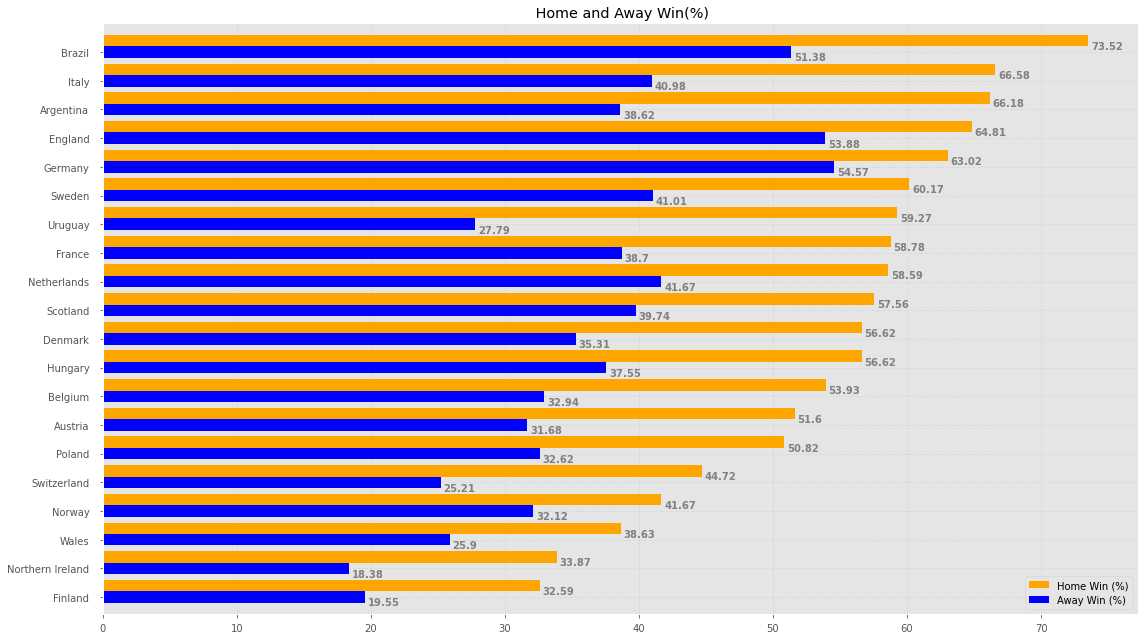

In [30]:
# Set the figure size
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.autolayout"] = True

# Array for horizontal bar's position
ind = np.arange(len(final.Team))

# Bar's width
width = .4

fig, ax = plt.subplots()

# Horizontal bar plot
ax.barh(ind, final['home_win%'], width, color='orange', label='Home Win (%)')
ax.barh(ind + width, final['away_win%'], width, color='blue', label='Away Win (%)')

# Set Y-axis ticks and ticklabels
ax.set(yticks=ind + width, yticklabels=final.Team,
ylim=[width - 1, len(ind)])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.5,alpha = 0.2)


# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

# Legend at the upper right corner
ax.legend()

# Add Plot Title
ax.set_title(' Home and Away Win(%)' )

# Display the plot
plt.show()

Teams with more significant home advantage

In [31]:
final['significance'] = final['home_win%']/final['away_win%']
final2 = final.sort_values('significance',ascending=False)
final2.head(5)

,Team,home_win%,away_win%,significance
18,Uruguay,59.271523,27.792208,2.132667
12,Northern Ireland,33.870968,18.380062,1.842810
17,Switzerland,44.723618,25.205479,1.774361
0,Argentina,66.180758,38.618926,1.713687
6,Finland,32.594937,19.554455,1.666880


Teams with less significant home advantage

In [32]:
final2.tail(5)

,Team,home_win%,away_win%,significance
3,Brazil,73.521127,51.376147,1.431036
11,Netherlands,58.593750,41.666667,1.406250
13,Norway,41.666667,32.124352,1.297043
5,England,64.806867,53.879310,1.202815
8,Germany,63.023256,54.568528,1.154938


We can see that there exists a home advantage for all the teams considered in the analysis as their win percentage at home is greater than their win percentage away. Teams like Uruguay,Northern Ireland and Switzerland have a much significant home advantage whereas the home advantage for teams like England , Norway and Germany are comparitively less significant